In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import the cleaned data
## Race data

In [58]:
df = pd.read_csv('./../data/cleaned/race_data.csv')
df.head()

,Division,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,when,location,track,championship
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,...,Alex,0.16,4.22,Hector,0,4.13,2023-04-22 10:11:57,Heroltice,4,cz
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,...,Bella,0.23,4.52,Bree,0,4.28,2023-04-22 10:11:57,Heroltice,5,cz
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,0.02,4.25,Dixie,...,Alex,0.34,4.25,Hector,0,4.18,2023-04-22 10:13:25,Heroltice,4,cz
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,...,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,5,cz
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,...,Alex,0.12,4.27,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,4,cz


## Dogs's data

In [59]:
df_alap = pd.read_csv('./../data/cleaned/dogs_data.csv')

In [60]:
df_alap.set_index('name', inplace=True)
df_alap.head()

,host,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height,age
name,,,,,,,,,
Dexter,TM800418,kooikerhondje,male,neutral,2010-02-14,93900005238999,14.05,25.0,14
Jasper,NP950613,border,male,neutral,2011-03-28,93900007189034,16.56,30.0,13
Angie,UF830429,border,female,neutral,2014-02-06,93900003827629,15.22,27.5,10
Alex,ZE801127,border,male,neutral,2014-04-22,93900003598960,17.95,32.5,10
Ashley,DP910919,border,female,neutral,2015-01-26,93900009738344,18.30,32.5,9


## Create basic dataframes for the further analysis

In [61]:
# Create a new df with only the WRFT team's race data
df['who'] = df['who'].str.lower()
df['with who'] = df['with who'].str.lower()
df_onlywild = df[df['who'].str.contains("wildrunner")]
df_onlywild.sort_values('when',inplace=True)
df_onlywild['when'] = df_onlywild['when'].astype('datetime64[ns]')

In [62]:
# Check the basic informations
df_onlywild.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 7078
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Division      1097 non-null   float64       
 1   who           1097 non-null   object        
 2   with who      1097 non-null   object        
 3   total time    1097 non-null   float64       
 4   W/L/T         1097 non-null   object        
 5   Hurdles       1097 non-null   float64       
 6   name          1097 non-null   object        
 7   start         1097 non-null   float64       
 8   1.dog         1097 non-null   object        
 9   name.1        1097 non-null   object        
 10  chng          1072 non-null   object        
 11  2.dog         1097 non-null   object        
 12  name.2        1097 non-null   object        
 13  chng.1        1079 non-null   object        
 14  3.dog         1097 non-null   object        
 15  name.3        1097 non-null   object       

In [63]:
# Sort time and change time data into a new dataframe (for the easier analysis for race times), then concat the dogs's basic data

dog_perf = pd.concat([df_onlywild[['name','start','1.dog','Hurdles']], df_onlywild[['name.1','chng','2.dog','Hurdles']].rename(columns={'name.1': 'name','chng': 'start','2.dog':'1.dog'}), 
                      df_onlywild[['name.2','chng.1','3.dog','Hurdles']].rename(columns={'name.2': 'name','chng.1': 'start','3.dog':'1.dog'}), 
                      df_onlywild[['name.3','chng.2','4.dog','Hurdles']].rename(columns={'name.3': 'name','chng.2': 'start','4.dog':'1.dog'})], ignore_index=True)
dog_perf = dog_perf.join(df_alap, on='name')
dog_perf.drop(['host','birth_date','chip_number'],axis=1,inplace=True)
dog_perf.rename(columns={'start':'chng','1.dog':'time'},inplace=True)
dog_perf.head()

,name,chng,time,Hurdles,breed,sex,castrated,ulna_length,hurdle_height,age
0,Sunny,-0.24,4.21,25.0,belgian shepherd - malinois,female,neutral,18.00,32.5,4
1,Brooke,-0.11,4.08,25.0,border,male,sexual,17.08,30.0,3
2,Sunny,0.02,4.25,25.0,belgian shepherd - malinois,female,neutral,18.00,32.5,4
3,Brooke,-0.63,4.25,25.0,border,male,sexual,17.08,30.0,3
4,Sunny,-0.06,4.21,25.0,belgian shepherd - malinois,female,neutral,18.00,32.5,4


In [64]:
# Create a new df without the errors represented by string values
numeric_columns = ['chng', 'time']
dog_perf_without_error = dog_perf.copy()
dog_perf_without_error[numeric_columns] = dog_perf_without_error[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [65]:
# Create a df with participation numbers
prtc = dog_perf_without_error[['time','name']].groupby('name').mean().join(dog_perf_without_error['name'].value_counts())
prtc = pd.concat([prtc,df_alap['age']],axis=1)

# EDA

<Axes: xlabel='when', ylabel='total time'>

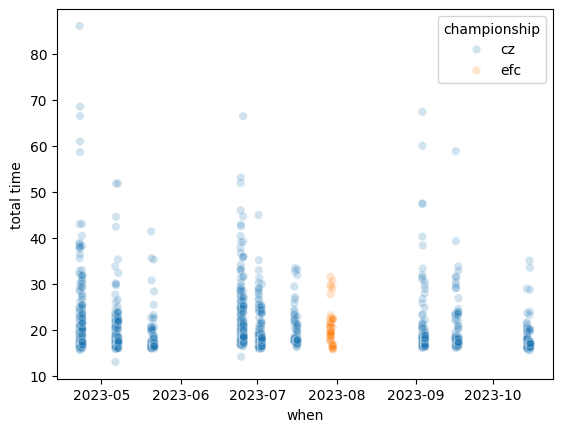

In [66]:
# Runtimes as the function of date
sns.scatterplot(data=df_onlywild, x='when', y='total time', hue='championship', alpha=0.2)

Text(0, 0.5, 'Team runtime [sec]')

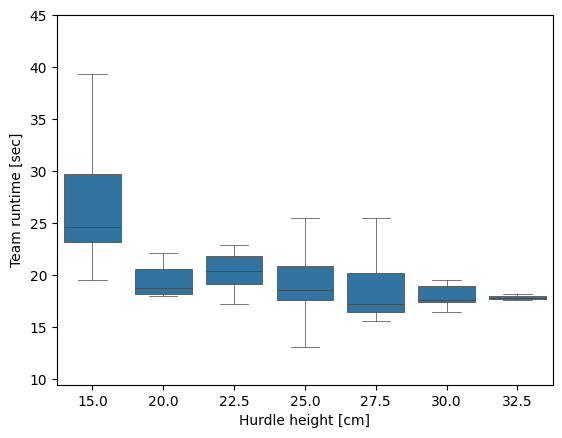

In [67]:
# Team runtimes as the function of hurdle height
sns.boxplot(data=df_onlywild,x='Hurdles',y='total time', linewidth=0.5, fliersize=False)
plt.ylim(top=45)
plt.xlabel('Hurdle height [cm]')
plt.ylabel('Team runtime [sec]')

<Axes: xlabel='count', ylabel='time'>

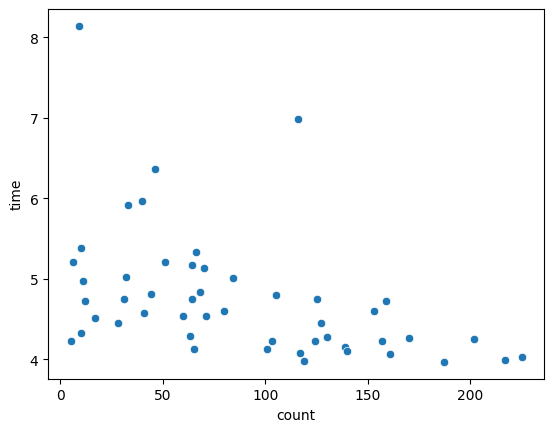

In [68]:
# Runtime as the function of participation number
sns.scatterplot(data=prtc,x='count',y='time')

Text(0, 0.5, 'Individual runtime [sec]')

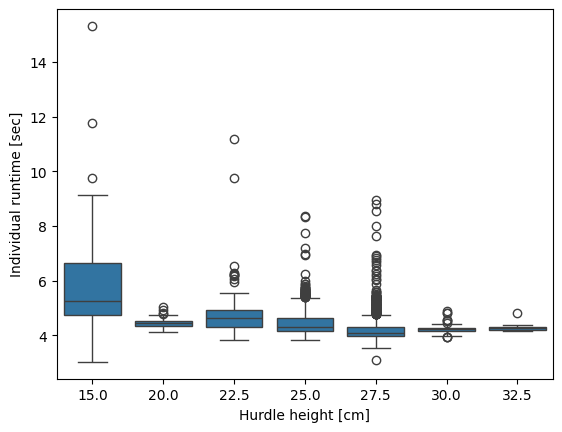

In [69]:
# Individual runtimes as the function of hurdle height
sns.boxplot(data=dog_perf_without_error, x='Hurdles', y='time')
plt.xlabel('Hurdle height [cm]')
plt.ylabel('Individual runtime [sec]')

sex
male      2198
female    2190
Name: count, dtype: int64
castrated
neutral    3438
sexual      950
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

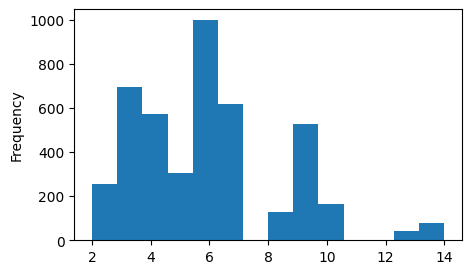

In [70]:
# Check the structure of the data
print(dog_perf_without_error['sex'].value_counts())
print(dog_perf_without_error['castrated'].value_counts())
dog_perf_without_error['age'].plot(kind='hist',bins=14,figsize=(5,3))

In [71]:
# Participation number by breed
dog_perf_without_error['breed'].value_counts()

breed
border                            2399
mix                                532
belgian shepherd - malinois        370
australian shepperd                217
american staffordshire terrier     159
sheltie                            140
australian kelpie                  136
jack russell terrier               116
whippet                            103
kooikerhondje                       80
parson russell terrier              58
mudi                                44
patterdale terrier                  28
small schnauzer                      6
Name: count, dtype: int64

In [72]:
# Participation number by dog names
dog_perf_without_error['name'].value_counts()

name
Maggie     225
Alfie      217
Bree       202
Enola      187
Hector     170
Tyna       161
Bella      159
Brooke     157
Hank       153
Pax        140
Nina       139
Alex       130
Dixie      130
Fleur      127
Mason      125
Falco      124
Moon       119
Sunny      117
Gordon     116
Bailey     105
Bonnie     103
Sirius     101
Negro       84
Dexter      80
Gerry       71
Speedy      70
Bruno       68
Kesha       66
Cookies     65
Abby        64
Rex         64
Ashley      63
Sara        60
Rocky       51
Dusty       46
Scotty      44
Brix        41
Jasper      40
Angie       33
Agnes       32
Ted         31
Easy        28
Riley       17
Henry       12
Jessie      11
Them        10
Milo        10
Kent         9
Punk         6
Apollo       5
Name: count, dtype: int64

In [73]:
# Every dog participated at least one race? If not, print the dog's data
df_alap[~df_alap.index.isin(dog_perf_without_error['name'])]

,host,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height,age
name,,,,,,,,,
Fibo,RK871018,magyar vizsla,male,neutral,2015-05-21,93900001757525,17.99,32.5,9


In [74]:
# Check the one outlier dog according to the above participation figure
df_alap.loc[prtc.loc[(prtc['time']>6.5) & (prtc['count']>100)].index]

,host,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height,age
name,,,,,,,,,
Gordon,HO800728,jack russell terrier,male,neutral,2015-04-12,93900001569304,9.67,15.0,9


<Axes: xlabel='time', ylabel='name'>

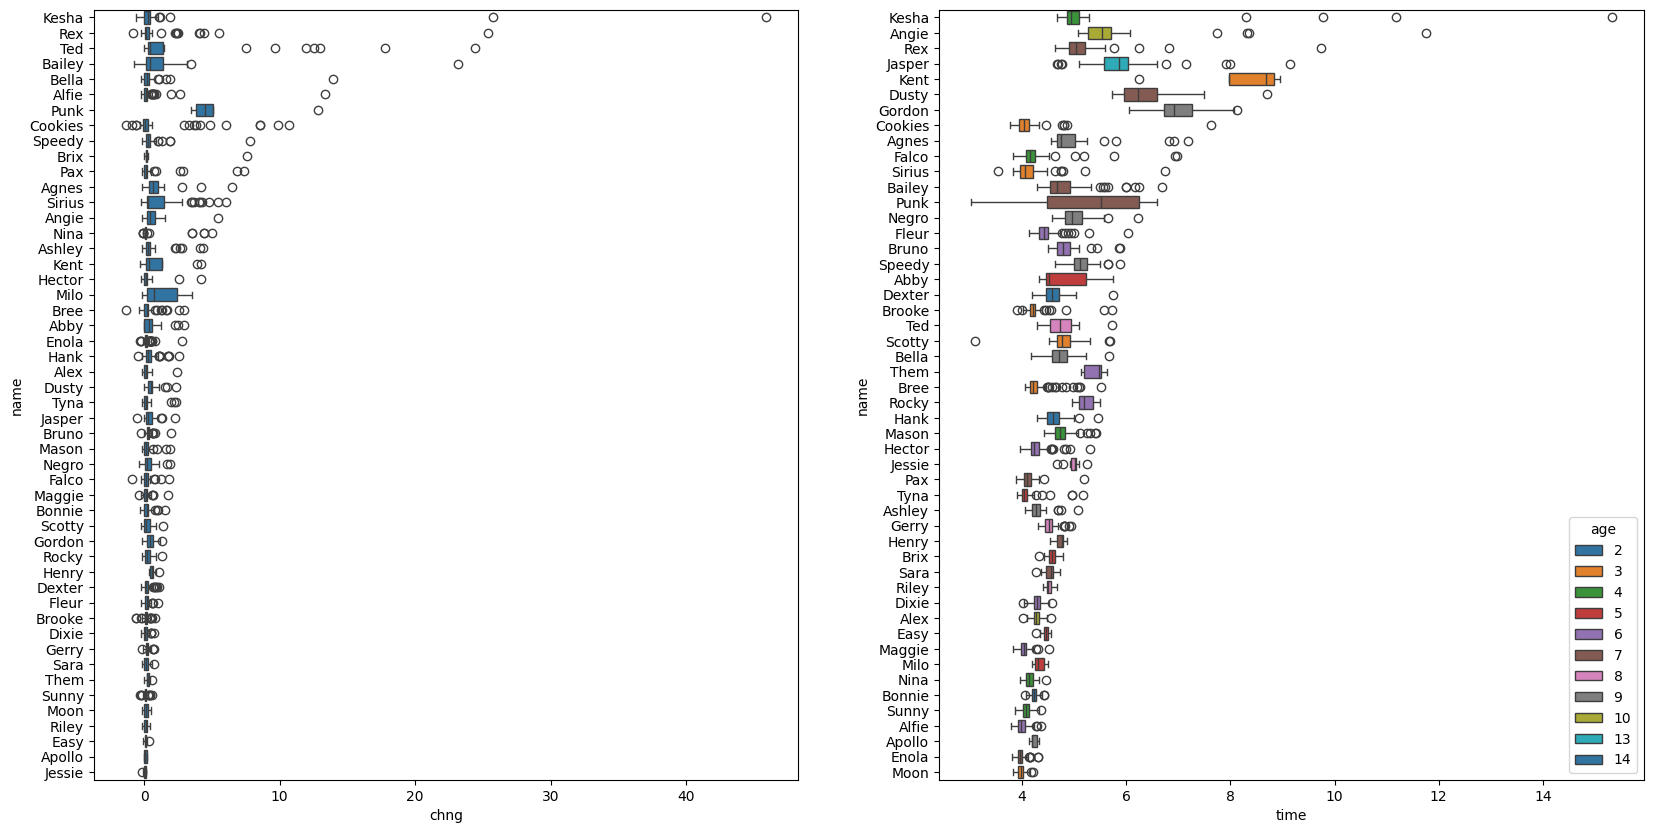

In [75]:
# Dogs's individual performance
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(data=dog_perf_without_error.sort_values(by='chng',ascending=False), y ='name', x='chng')
plt.subplot(122)
sns.boxplot(data=dog_perf_without_error.sort_values(by='time',ascending=False), y ='name', x='time', hue='age', dodge=False, palette='tab10')

<Axes: xlabel='time', ylabel='breed'>

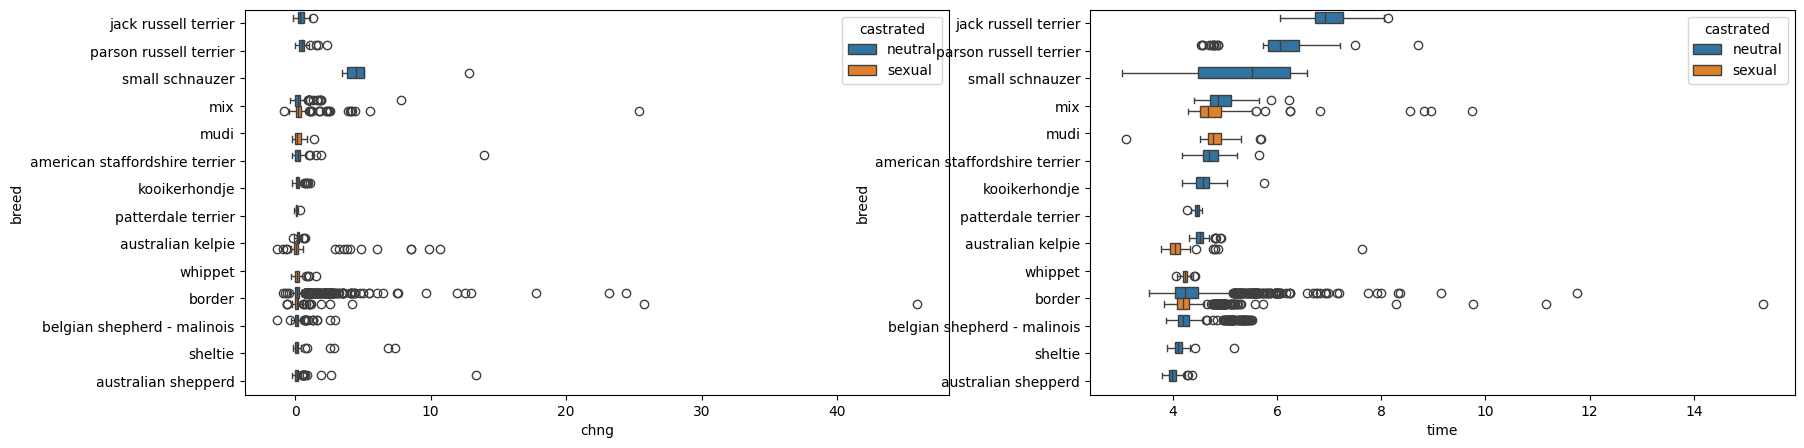

In [76]:
# Performance by breed and categorised by castrated
plt.figure(figsize=(20,5))
my_order = dog_perf_without_error.groupby(by=["breed"])["time"].median().sort_values(ascending=False).index
plt.subplot(121)
sns.boxplot(data=dog_perf_without_error, y ='breed', x='chng', hue='castrated', order=my_order)
plt.subplot(122)
sns.boxplot(data=dog_perf_without_error, y ='breed', x='time', hue='castrated', order=my_order)

<Axes: xlabel='time', ylabel='breed'>

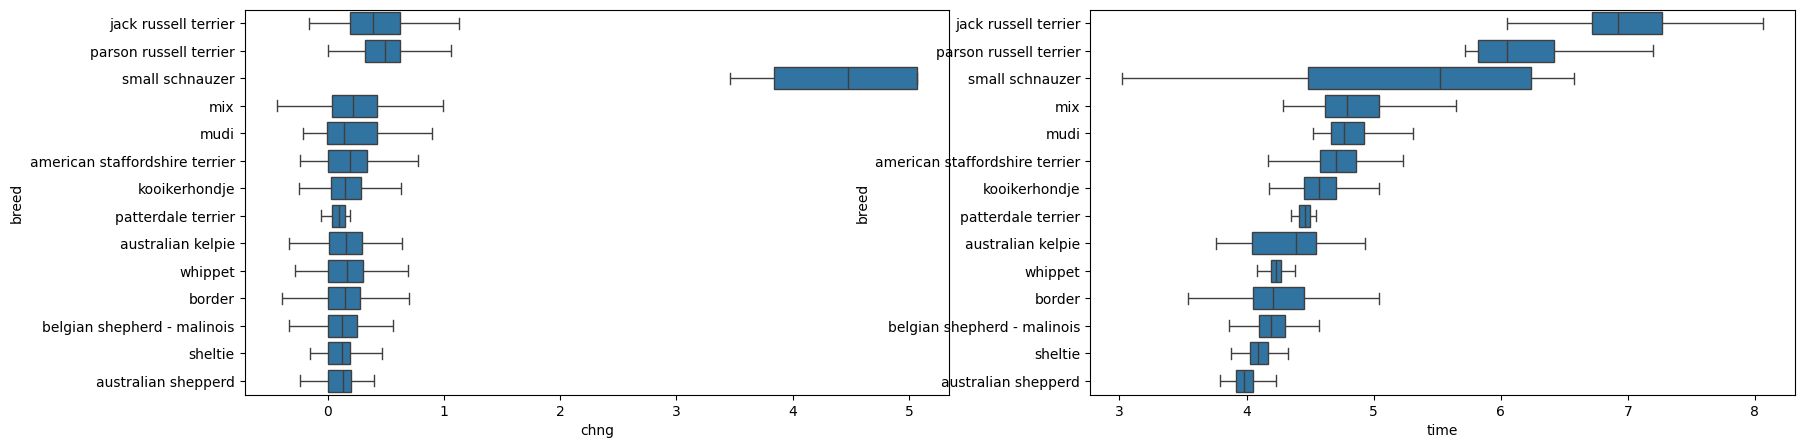

In [77]:
# Performance by breed without outliers
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(data=dog_perf_without_error, y ='breed', x='chng', order=my_order, showfliers=False)
plt.subplot(122)
sns.boxplot(data=dog_perf_without_error, y ='breed', x='time', order=my_order, showfliers=False)

<Axes: xlabel='castrated', ylabel='time'>

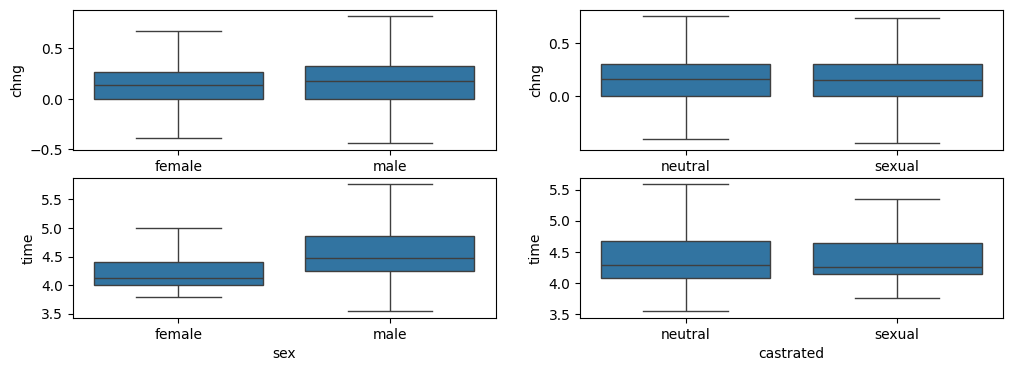

In [78]:
# Comparison of the sex and castrated effect, without outliers
plt.figure(figsize=(12,4))
plt.subplot(221)
sns.boxplot(data=dog_perf_without_error,y='chng',x='sex', showfliers=False) 
plt.subplot(222)
sns.boxplot(data=dog_perf_without_error,y='chng',x='castrated', showfliers=False)
plt.subplot(223)
sns.boxplot(data=dog_perf_without_error,y='time',x='sex', showfliers=False)
plt.subplot(224)
sns.boxplot(data=dog_perf_without_error,y='time',x='castrated', showfliers=False)

In [79]:
# Check the median time values
print ('Difference of median value, % : '+ str((dog_perf_without_error[dog_perf_without_error['sex']=='kan']['time'].median() - dog_perf_without_error[dog_perf_without_error['sex']=='szuka']['time'].median())/dog_perf_without_error['time'].median()*100))
print ('Difference of median value, sec: '+ str(dog_perf_without_error[dog_perf_without_error['sex']=='kan']['time'].median() - dog_perf_without_error[dog_perf_without_error['sex']=='szuka']['time'].median()))

Difference of median value, % : nan
Difference of median value, sec: nan


<Axes: xlabel='castrated', ylabel='time'>

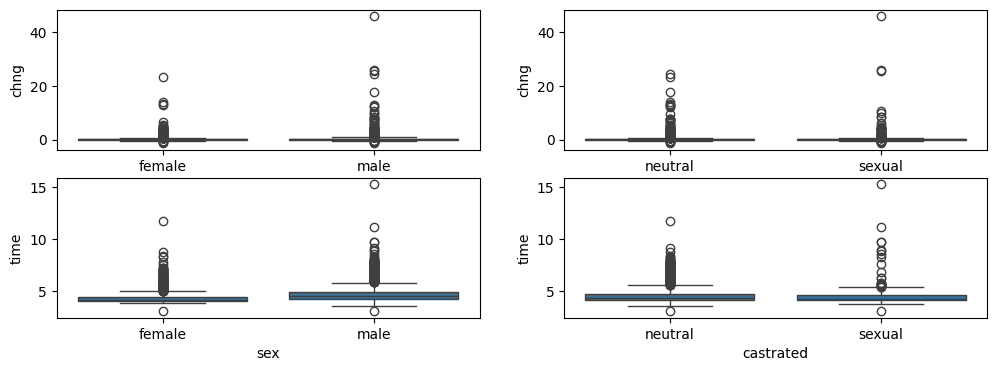

In [80]:
# Comparison of the sex and castrated effect, with outliers
plt.figure(figsize=(12,4))
plt.subplot(221)
sns.boxplot(data=dog_perf_without_error,y='chng',x='sex')
plt.subplot(222)
sns.boxplot(data=dog_perf_without_error,y='chng',x='castrated')
plt.subplot(223)
sns.boxplot(data=dog_perf_without_error,y='time',x='sex')
plt.subplot(224)
sns.boxplot(data=dog_perf_without_error,y='time',x='castrated')

<Axes: xlabel='time', ylabel='Count'>

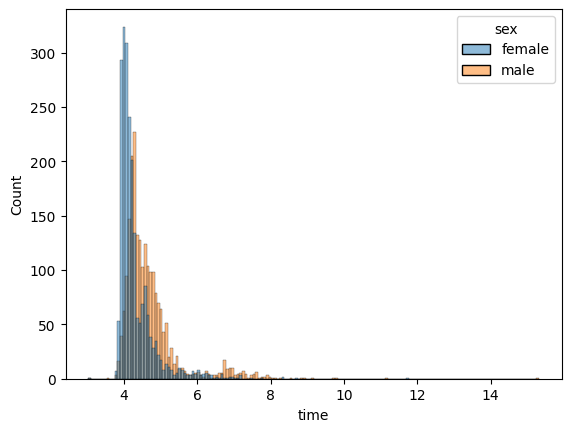

In [81]:
# Runtime distribution by sex
sns.histplot(data=dog_perf_without_error,x='time',hue='sex')

<Axes: xlabel='time', ylabel='Count'>

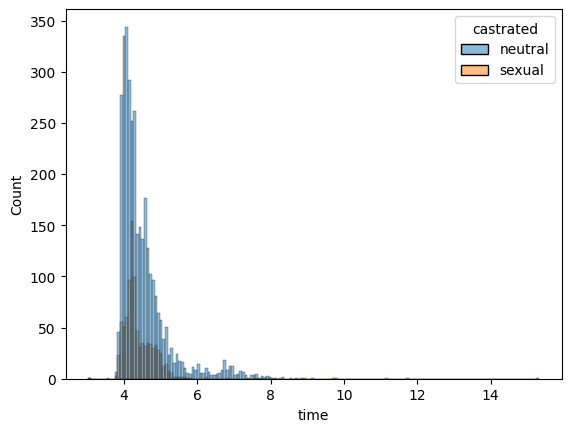

In [82]:
# Runtime distribution by castrated state
sns.histplot(data=dog_perf_without_error,x='time',hue='castrated')

<Axes: xlabel='age', ylabel='chng'>

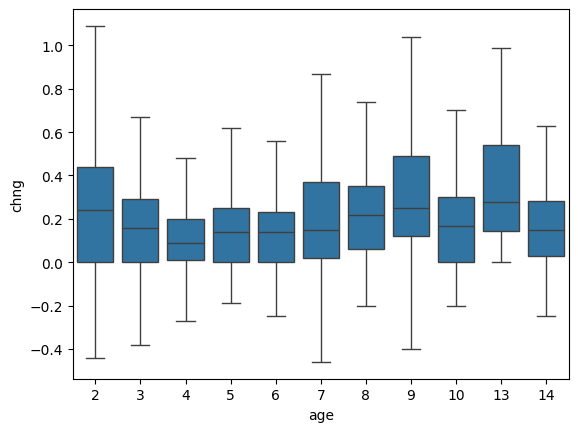

In [83]:
# Chenge time at the function of age
sns.boxplot(data=dog_perf_without_error, x='age', y='chng', showfliers=False)

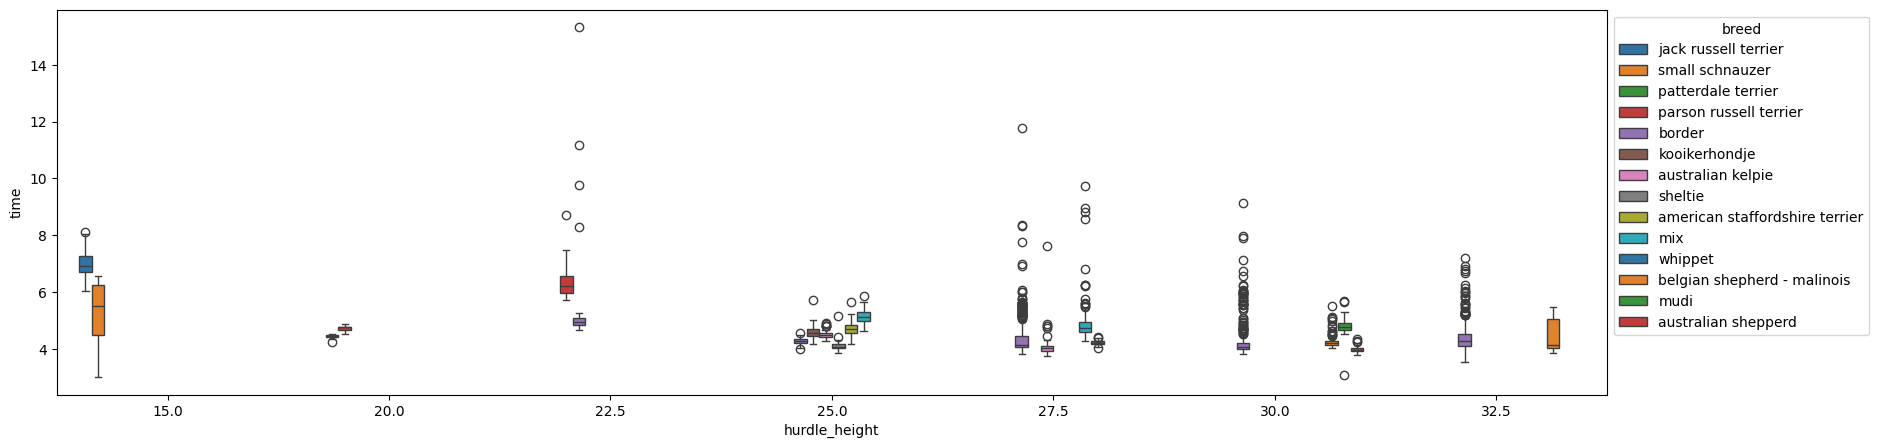

In [84]:
# Runtimes according to the hurdle height and breeds
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=dog_perf_without_error, x='hurdle_height', y='time', hue='breed', palette='tab10')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='hurdle_height', ylabel='time'>

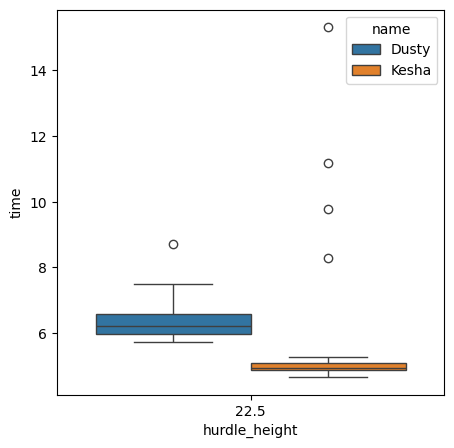

In [85]:
# There are a lot of outliers at 22.5cm height, so check it:
plt.figure(figsize=(5,5))
sns.boxplot(data=dog_perf_without_error[dog_perf_without_error['hurdle_height']==22.5], x='hurdle_height', y='time', hue='name')

<Axes: ylabel='4.dog'>

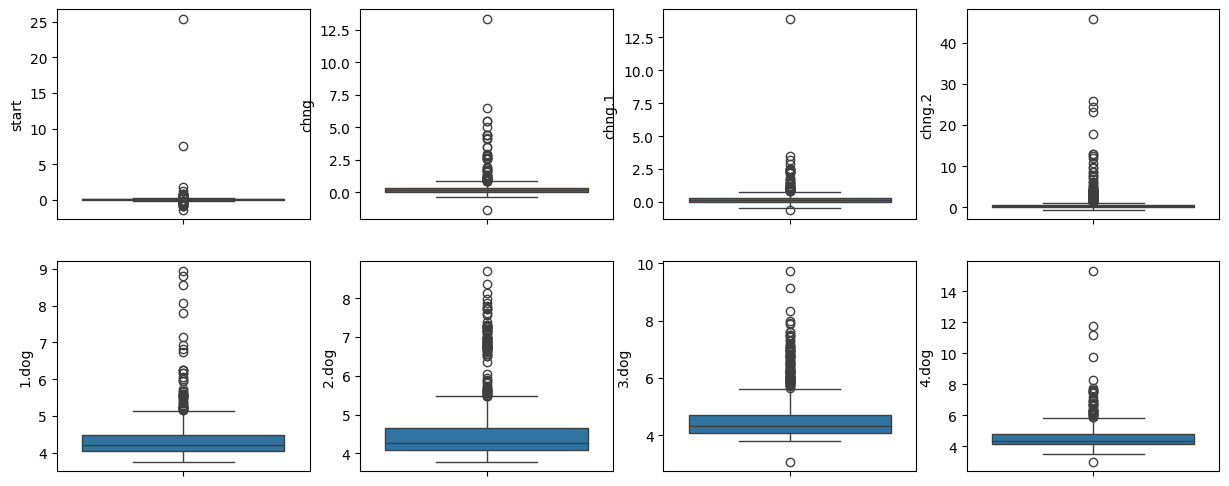

In [86]:
# There are a trend for runtimes or changetimes within one race?
plt.figure(figsize=(15,6))
plt.subplot(241)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='start')
plt.subplot(242)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='chng')
plt.subplot(243)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='chng.1')
plt.subplot(244)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='chng.2')

plt.subplot(245)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='1.dog')
plt.subplot(246)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='2.dog')
plt.subplot(247)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='3.dog')
plt.subplot(248)
sns.boxplot(data=df_onlywild.apply(pd.to_numeric, errors='coerce'),y='4.dog')

In [87]:
# Rankings ratio
df_onlywild['W/L/T'].replace({'V':'W','P':'L'}).value_counts()

W/L/T
L    647
W    448
T      2
Name: count, dtype: int64

(10.0, 60.0)

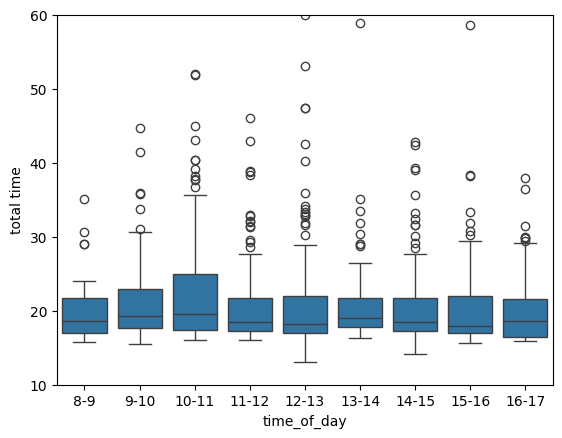

In [88]:
# Define one hour sections, to analysis the performance for a race day
def f(x):
    if (x == 8):
        return '8-9'
    elif (x == 9):
        return '9-10'
    elif (x == 10):
        return'10-11'
    elif (x == 11):
        return '11-12'
    elif (x == 12):
        return '12-13'
    elif (x == 13):
        return '13-14'
    elif (x == 14):
        return '14-15'
    elif (x == 15):
        return '15-16'
    elif (x == 16):
        return '16-17'
    elif (x == 17):
        return '17-18'
    
df_onlywild['time_of_day'] = df_onlywild['when'].dt.hour.apply(f)

sns.boxplot(data=df_onlywild,x='time_of_day',y='total time',order=['8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17'])
plt.ylim([10,60])

## Dog's error analysis

#### Possible errors:

- for time variables: 'ran in', 'outside' errors
- for start and change time variables: -, 'error' errors 

<Axes: xlabel='name'>

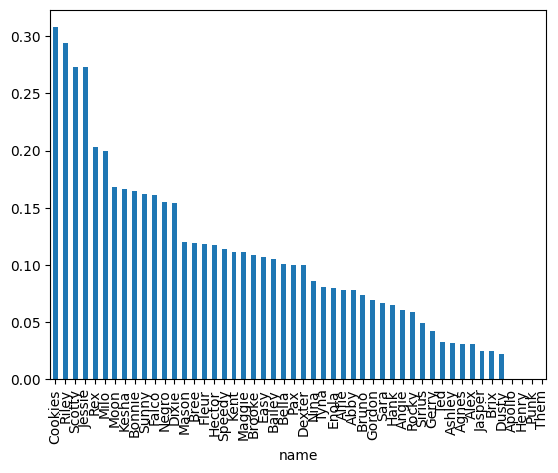

In [89]:
# Check the faulty changes (as a ratio) by dog names
(dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ].groupby('name').count()['chng']/ dog_perf['name'].value_counts()).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='count', ylabel='0'>

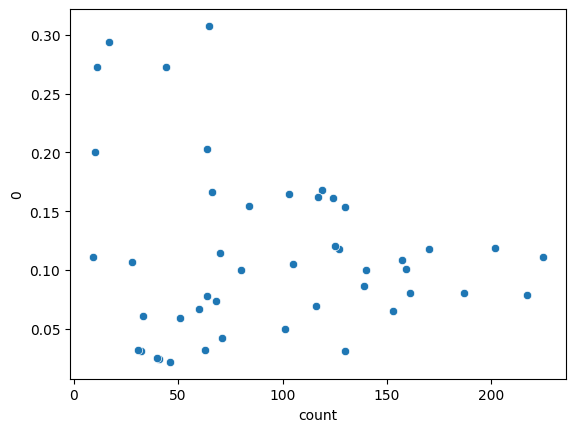

In [90]:
# Check the error ratio as the function of participation number
sns.scatterplot(data = pd.concat([prtc, (dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ].groupby('name').count()['chng']/ dog_perf['name'].value_counts())],axis=1), x='count', y=0)

<Axes: xlabel='name'>

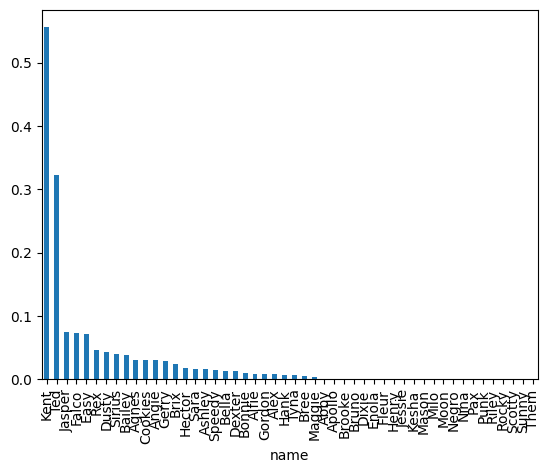

In [91]:
# Check the faulty runs (as a ratio) by dog names
(dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ].groupby('name').count()['time']/ dog_perf['name'].value_counts()).sort_values(ascending=False).plot(kind='bar')

In [92]:
# Summarize the error ratios according to breeds and error types
mistakes = pd.DataFrame()
mistakes = pd.concat([mistakes, pd.DataFrame(dog_perf.groupby('breed').count()['age']).rename(columns={'age':'total_num_of_breed'})],axis=1)
mistakes['error_at_chng'] = (dog_perf[dog_perf['chng']=='error'].groupby('breed').count()['chng'] /mistakes['total_num_of_breed'])*100
mistakes['negative_chng'] = (dog_perf[dog_perf['chng'].astype(str).str.contains('-')].groupby('breed').count()['chng'] /mistakes['total_num_of_breed'])*100
mistakes['ran_in'] = (dog_perf[dog_perf['time']=='ran in'].groupby('breed').count()['time'] /mistakes['total_num_of_breed'])*100
mistakes['outside'] = (dog_perf[dog_perf['time']=='outside'].groupby('breed').count()['time'] /mistakes['total_num_of_breed'])*100

# Highlight the high values with red color
mistakes.style.bar(color='#d65f5f')

,total_num_of_breed,error_at_chng,negative_chng,ran_in,outside
breed,,,,,
american staffordshire terrier,159,6.918239,3.144654,nan,1.257862
australian kelpie,136,0.735294,16.176471,nan,2.941176
australian shepperd,217,5.069124,2.764977,0.460829,0.460829
belgian shepherd - malinois,370,4.054054,8.378378,nan,0.270270
border,2399,4.626928,5.168820,0.541892,1.167153
jack russell terrier,116,4.310345,2.586207,nan,0.862069
kooikerhondje,80,2.500000,7.500000,nan,1.250000
mix,532,4.323308,7.894737,0.563910,1.315789
mudi,44,nan,27.272727,nan,nan


<Axes: xlabel='breed'>

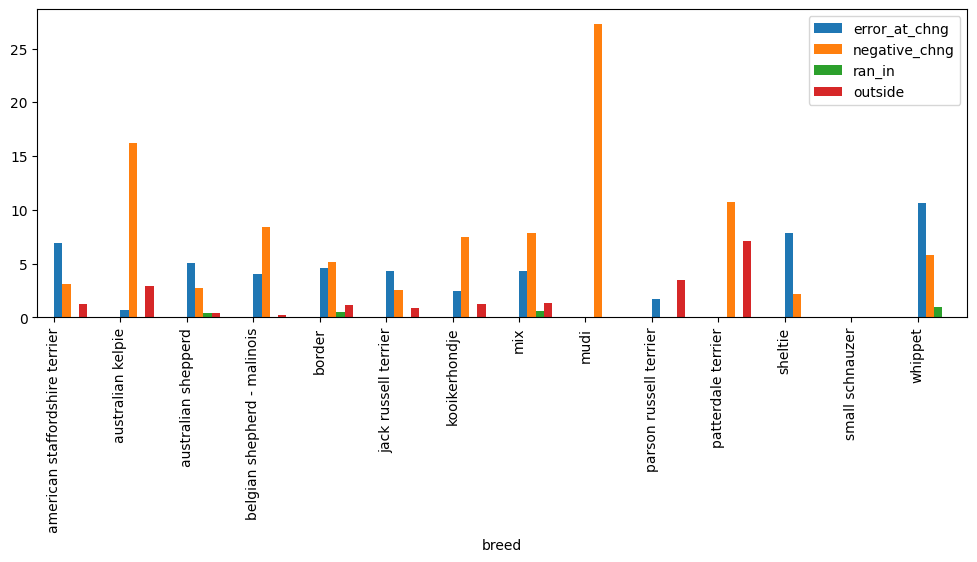

In [93]:
# Plot error rates by breed and error type
mistakes[['error_at_chng', 'negative_chng', 'ran_in', 'outside']].plot(kind='bar', stacked=False, width=0.5, align='edge',figsize=(12,4))

In [94]:
# Check that why error ratio was high for breed 'australian kelpie'
dog_perf[(dog_perf['breed']=='australian kelpie') & (dog_perf['chng'].astype(str).str.contains('-'))]['name'].value_counts()

name
Cookies    20
Gerry       2
Name: count, dtype: int64

In [95]:
# Check the basic data for dog name 'Cookies'
df_alap[df_alap.index=='Cookies']

,host,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height,age
name,,,,,,,,,
Cookies,RN891016,australian kelpie,male,sexual,2021-04-09,93900008401355,15.12,27.5,3


In [96]:
# Comparison of error rates according to sex, castrate state and age
# For change errors
print((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-'))]['sex'].value_counts() / dog_perf['sex'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-'))]['castrated'].value_counts() / dog_perf['castrated'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-'))]['age'].value_counts() / dog_perf['age'].value_counts().sort_index()).round(4))

sex
female    0.105936
male      0.106005
Name: count, dtype: float64
castrated
neutral    0.094241
sexual     0.148421
Name: count, dtype: float64
age
2     0.1055
3     0.1420
4     0.1349
5     0.0789
6     0.1052
7     0.0935
8     0.0923
9     0.0907
10    0.0368
13    0.0250
14    0.1000
Name: count, dtype: float64


In [97]:
# For ran in errors
print((dog_perf[(dog_perf['time']=='ran in')]['sex'].value_counts() / dog_perf['sex'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['time']=='ran in')]['castrated'].value_counts() / dog_perf['castrated'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['time']=='ran in')]['age'].value_counts() / dog_perf['age'].value_counts().sort_index()).round(4))

sex
female    0.004566
male      0.003640
Name: count, dtype: float64
castrated
neutral    0.003490
sexual     0.006316
Name: count, dtype: float64
age
2     0.0078
3     0.0043
4     0.0070
5     0.0033
6     0.0040
7        NaN
8        NaN
9     0.0057
10    0.0061
13       NaN
14       NaN
Name: count, dtype: float64


In [98]:
# For outside errors
print((dog_perf[(dog_perf['time']=='outside')]['sex'].value_counts()  / dog_perf['sex'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['time']=='outside')]['castrated'].value_counts()  / dog_perf['castrated'].value_counts().sort_index()) )
print((dog_perf[(dog_perf['time']=='outside')]['age'].value_counts().sort_index() / dog_perf['age'].value_counts().sort_index()).round(4))

sex
female    0.007763
male      0.014559
Name: count, dtype: float64
castrated
neutral    0.011635
sexual     0.009474
Name: count, dtype: float64
age
2        NaN
3     0.0129
4     0.0088
5     0.0099
6     0.0020
7     0.0161
8     0.0923
9     0.0057
10    0.0061
13    0.0750
14    0.0125
Name: count, dtype: float64


(0.0, 1.910828025477707)

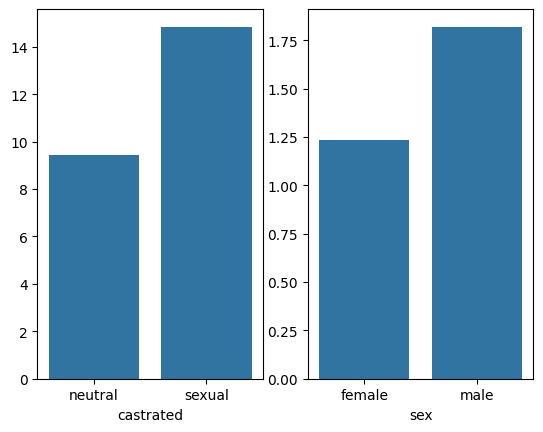

In [99]:
# Plot on figure
plt.subplot(121)
sns.barplot( x = (dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-'))]['castrated'].value_counts() / dog_perf['castrated'].value_counts().sort_index()).index, y = (dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-'))]['castrated'].value_counts() / dog_perf['castrated'].value_counts().sort_index()).values*100 )
plt.ylim(bottom=0)

plt.subplot(122)
sns.barplot( x = (dog_perf[(dog_perf['time']=='outside') | (dog_perf['time']=='ran in')]['sex'].value_counts()  / dog_perf['sex'].value_counts().sort_index()).index, y = (dog_perf[(dog_perf['time']=='outside') | (dog_perf['time']=='ran in')]['sex'].value_counts()  / dog_perf['sex'].value_counts().sort_index()).values*100 )
plt.ylim(bottom=0)

<Axes: xlabel='when', ylabel='chng'>

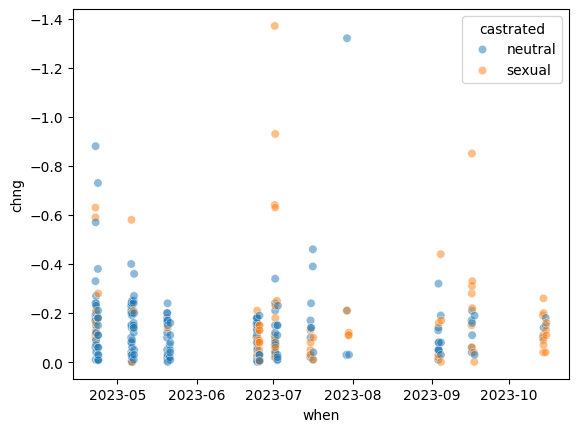

In [100]:
# Are there a trend for negative type change errors through the season?
dog_perf_w_when = pd.concat([df_onlywild[['name','start','1.dog','when','championship']], df_onlywild[['name.1','chng','2.dog','when','championship']].rename(columns={'name.1': 'name','chng': 'start','2.dog':'1.dog'}), df_onlywild[['name.2','chng.1','3.dog','when','championship']].rename(columns={'name.2': 'name','chng.1': 'start','3.dog':'1.dog'}), df_onlywild[['name.3','chng.2','4.dog','when','championship']].rename(columns={'name.3': 'name','chng.2': 'start','4.dog':'1.dog'})], ignore_index=True)
dog_perf_w_when = dog_perf_w_when.join(df_alap, on='name')
dog_perf_w_when.drop(['host','birth_date','chip_number','ulna_length'],axis=1,inplace=True)
dog_perf_w_when.rename(columns={'start':'chng','1.dog':'time'},inplace=True)
sns.scatterplot(data=dog_perf_w_when[dog_perf_w_when['chng'].astype(str).str.contains('-')].sort_values('when'),x='when',y='chng',hue='castrated',alpha=0.5)

<Axes: xlabel='time_of_day'>

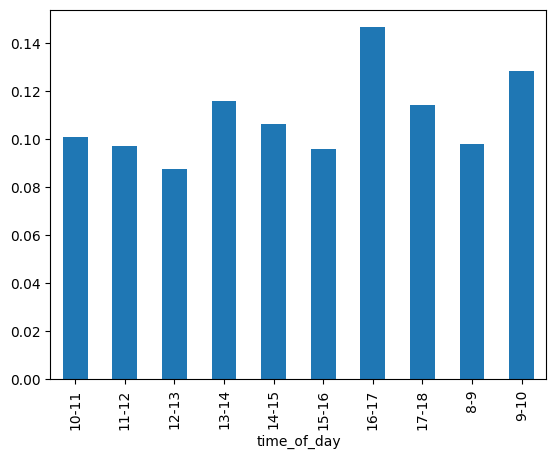

In [101]:
# What time of day does the errors occur?
dog_perf_w_when['when'] = dog_perf_w_when['when'].astype('datetime64[ns]')
dog_perf_w_when['time_of_day'] = dog_perf_w_when['when'].dt.hour.apply(f)

(dog_perf_w_when[(dog_perf_w_when['chng']=='error') | (dog_perf_w_when['chng'].astype(str).str.contains('-'))].groupby('time_of_day').count()['name'] / dog_perf_w_when['time_of_day'].value_counts()).sort_index().plot(kind='bar')

## Cleaned figures for the final presentation

Text(0, 0.5, 'Average team\nruntime [sec]')

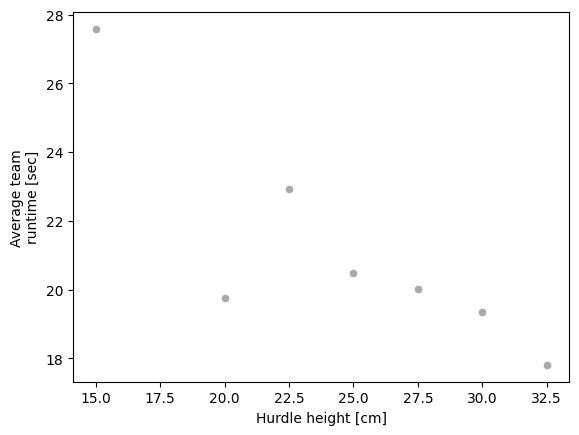

In [102]:
# Team runtime at the function of hurdle height, on a scatterplot
sns.scatterplot(data = df_onlywild[['Hurdles', 'total time']].groupby(by='Hurdles').mean().reset_index(), x='Hurdles', y='total time', color='#A9A9A9')
plt.xlabel('Hurdle height [cm]')
plt.ylabel('Average team''\n''runtime [sec]')

Text(0, 0.5, 'Average individual\nruntime [sec]')

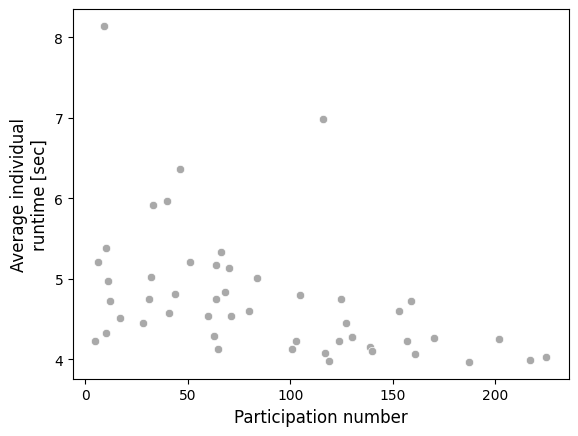

In [103]:
# Average individual runtime at the function of participation
sns.scatterplot(data=prtc,x='count',y='time', color='#A9A9A9')
plt.xlabel('Participation number', fontsize=12)
plt.ylabel(r"Average individual""\n"r"runtime [sec]", fontsize=12)

Text(0, 0.5, 'Error ratio for\nrun or change [%]')

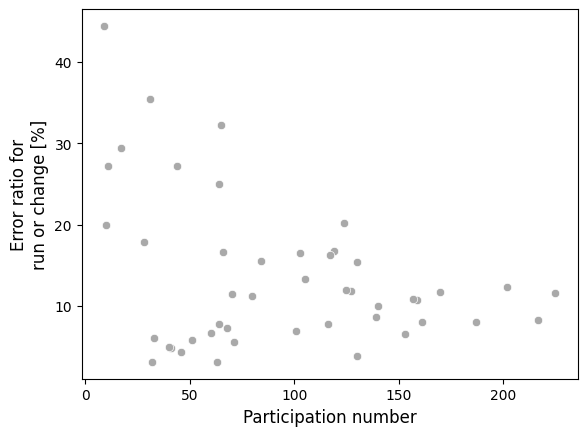

In [104]:
# Participation and error rates comparison
sns.scatterplot(data = pd.concat([prtc, (dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) | (dog_perf['time']=='ran in') | (dog_perf['time']=='outside')].groupby('name').count()['chng']/ dog_perf['name'].value_counts())*100],axis=1), x='count', y=0*100, color='#A9A9A9')
plt.xlabel('Participation number', fontsize=12)
plt.ylabel(r"Error ratio for"'\n'"run or change [%]", fontsize=12)

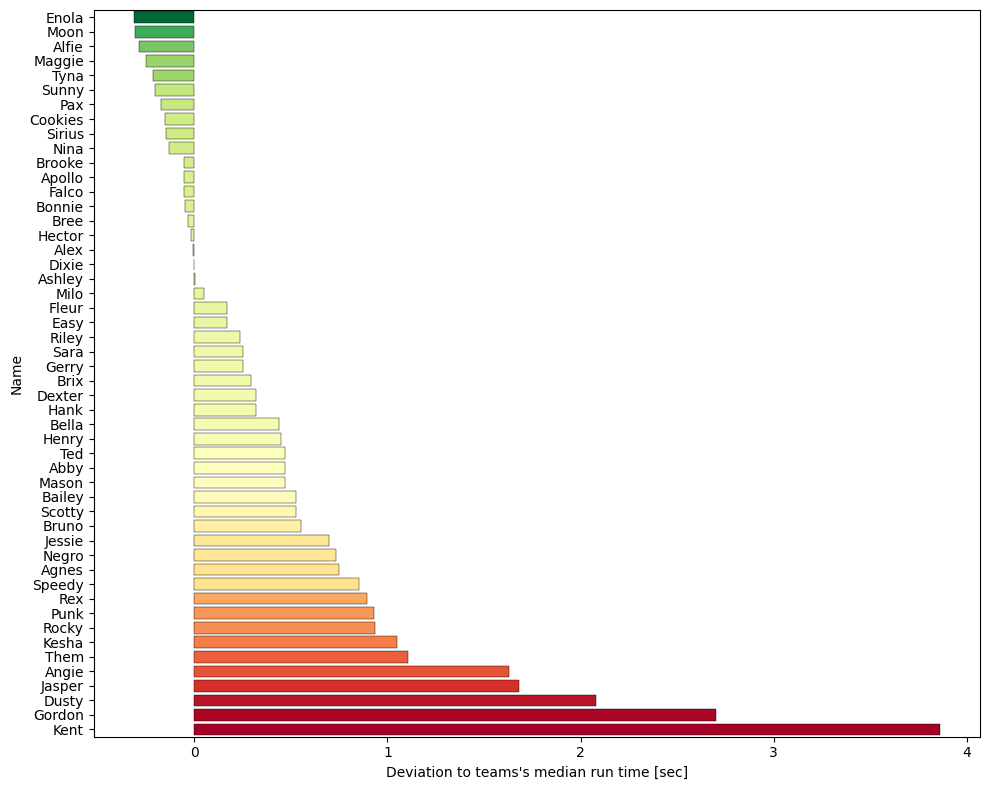

In [105]:
# Individual dog performance and the difference to the team's median. First, collect the data in a new df then group and sort it:
for_bar_chart = dog_perf_without_error[['time','name']].groupby(by='name').mean().sort_values(by='time',ascending=True).reset_index()
for_bar_chart['time_dif'] = for_bar_chart['time']-dog_perf_without_error['time'].median()

# Plot it
plt.figure(figsize=(10,8))
ax = sns.barplot(data=for_bar_chart, x='time_dif', y='name', edgecolor='black', linewidth=0.3)

widths = np.array( [bar.get_width() for bar in ax.containers[0]])
divnorm = mpl.colors.TwoSlopeNorm(vmin=widths.min(), vcenter=0, vmax=widths.max())
div_colors = plt.cm.RdYlGn(divnorm(widths))[::-1]
for bar, color in zip(ax.containers[0], div_colors):
    bar.set_facecolor(color)
plt.xlabel("Deviation to teams's median run time [sec]")
plt.ylabel('Name')
plt.tight_layout()
plt.show()

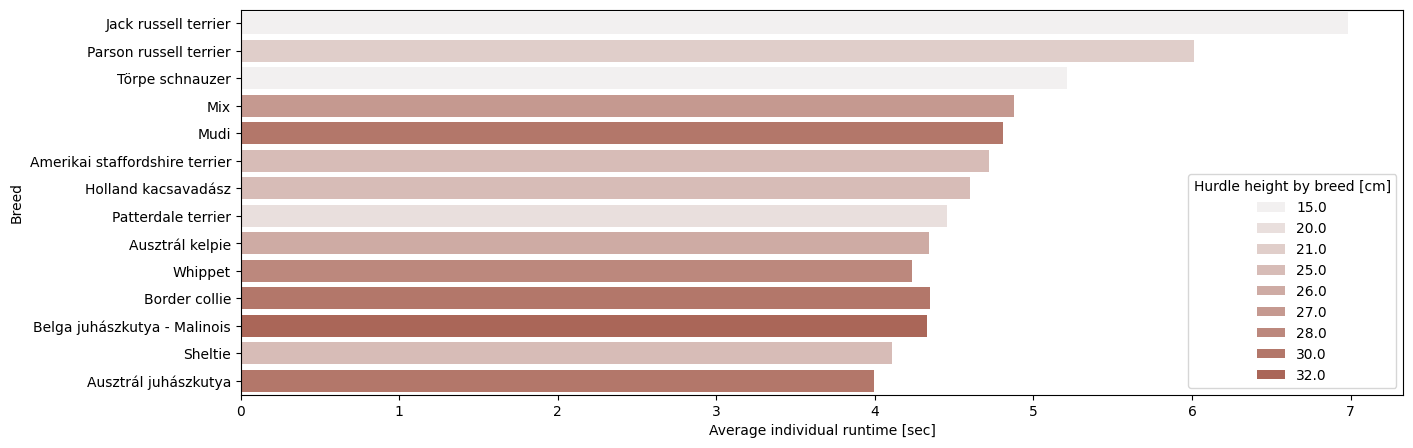

In [106]:
# Hurdle height by individual dogs and performace
# Add the average hurdle height per dog to the basic df
dog_perf_without_error = dog_perf_without_error.join(df_alap[['breed','hurdle_height']].groupby(by='breed').mean().round(1).reset_index().set_index('breed'), on='breed', rsuffix='_breed_mean')

# Plot it
plt.figure(figsize=(15,5))
fig = sns.barplot(data=dog_perf_without_error, y ='breed', x='time',order=my_order, estimator='mean', errorbar=None, hue=(dog_perf_without_error['hurdle_height_breed_mean'].round(0)), dodge=False, linewidth=0.5, palette=sns.light_palette((20, 60, 50), 9, input="husl"))
plt.xlabel('Average individual runtime [sec]')
plt.ylabel('Breed')
plt.legend(loc='lower right', title='Hurdle height by breed [cm]')
fig.set_yticklabels(['Jack russell terrier', 'Parson russell terrier', 'Törpe schnauzer', 'Mix', 'Mudi', 'Amerikai staffordshire terrier', 'Holland kacsavadász', 'Patterdale terrier', 'Ausztrál kelpie', 'Whippet', 'Border collie', 'Belga juhászkutya - Malinois', 'Sheltie', 'Ausztrál juhászkutya']);

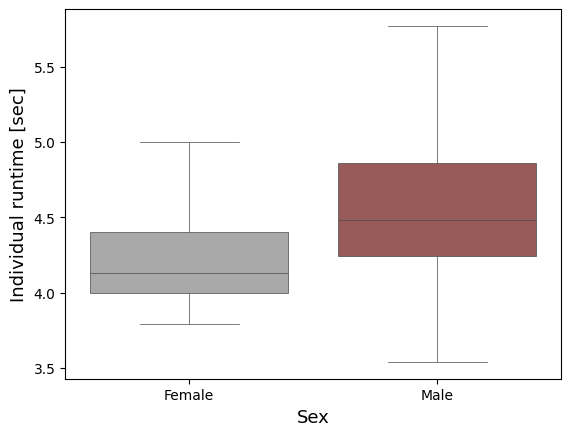

In [109]:
# Individual runtime by sex
my_pal = {'female': '#A9A9A9', 'male': '#a2514e'}
fig = sns.boxplot(data=dog_perf_without_error, y='time', x='sex', showfliers=False, linewidth=0.5, palette=my_pal)
plt.xlabel('Sex', fontsize=13)
plt.ylabel('Individual runtime [sec]', fontsize=13)
fig.set_xticklabels(['Female', 'Male']);

Text(0, 0.5, 'Obstacle passed\nerror rate [%]')

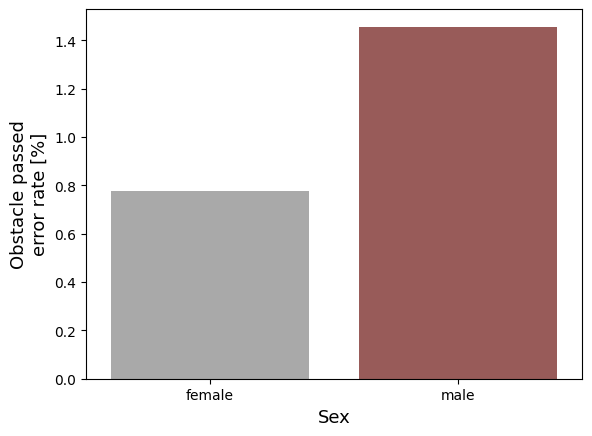

In [111]:
sns.barplot( x = (dog_perf[(dog_perf['time']=='outside') ]['sex'].value_counts()  / dog_perf['sex'].value_counts()).sort_values(ascending=True).index, y = (dog_perf[(dog_perf['time']=='outside') ]['sex'].value_counts()  / dog_perf['sex'].value_counts()).sort_values(ascending=True).values*100, palette=my_pal )
plt.ylim(bottom=0)
plt.xlabel('Sex', fontsize=13)
plt.ylabel('Obstacle passed''\n''error rate [%]', fontsize=13)

Text(0, 0.5, 'Average individual runtime [sec]')

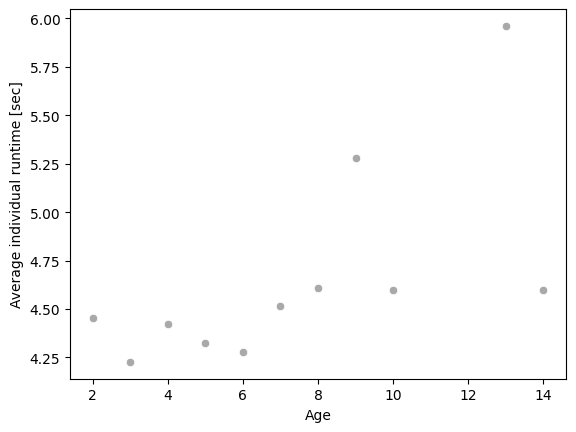

In [112]:
# Average individual runtime by age
sns.scatterplot(data = dog_perf_without_error[['age', 'time']].groupby(by='age').mean().reset_index(), x='age', y='time', color='#A9A9A9')
plt.xlabel('Age')
plt.ylabel('Average individual runtime [sec]')